# Python Stats Exercises

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
from pandas import plotting
from scipy import stats
import seaborn as sns
from statsmodels.formula.api import ols
import urllib

In [2]:
data = pd.read_csv('brain_size.csv', sep=';', na_values=".")
print(data)

    Unnamed: 0  Gender  FSIQ  VIQ  PIQ  Weight  Height  MRI_Count
0            1  Female   133  132  124   118.0    64.5     816932
1            2    Male   140  150  124     NaN    72.5    1001121
2            3    Male   139  123  150   143.0    73.3    1038437
3            4    Male   133  129  128   172.0    68.8     965353
4            5  Female   137  132  134   147.0    65.0     951545
5            6  Female    99   90  110   146.0    69.0     928799
6            7  Female   138  136  131   138.0    64.5     991305
7            8  Female    92   90   98   175.0    66.0     854258
8            9    Male    89   93   84   134.0    66.3     904858
9           10    Male   133  114  147   172.0    68.8     955466
10          11  Female   132  129  124   118.0    64.5     833868
11          12    Male   141  150  128   151.0    70.0    1079549
12          13    Male   135  129  124   155.0    69.0     924059
13          14  Female   140  120  147   155.0    70.5     856472
14        

In [3]:
groupby_gender = data.groupby('Gender')

# Exercise 1

In [4]:
# What is the mean value for VIQ for the full population?
data['VIQ'].mean()

112.35

In [5]:
# How many males/females were included in this study?
f = data[data['Gender'] == 'Female']['Gender'].count()
m = data[data['Gender'] == 'Male']['Gender'].count()
print('Females: {}'.format(f))
print('Males: {}'.format(m))

Females: 20
Males: 20


In [6]:
# What is the average value of MRI counts expressed in log units, for males and females?
for gender, value in groupby_gender['MRI_Count']:
    print((gender, value.mean()))

('Female', 862654.6)
('Male', 954855.4)


# Exercise 2

In [7]:
# Plot the scatter matrix for males only, and for females only. 
# Do you think that the 2 sub-populations correspond to gender?

In [8]:
data1 = data[data['Gender'] == 'Female']
data1

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
4,5,Female,137,132,134,147.0,65.0,951545
5,6,Female,99,90,110,146.0,69.0,928799
6,7,Female,138,136,131,138.0,64.5,991305
7,8,Female,92,90,98,175.0,66.0,854258
10,11,Female,132,129,124,118.0,64.5,833868
13,14,Female,140,120,147,155.0,70.5,856472
14,15,Female,96,100,90,146.0,66.0,878897
15,16,Female,83,71,96,135.0,68.0,865363
16,17,Female,132,132,120,127.0,68.5,852244


In [9]:
data2 = data[data['Gender'] == 'Male']
data2

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
8,9,Male,89,93,84,134.0,66.3,904858
9,10,Male,133,114,147,172.0,68.8,955466
11,12,Male,141,150,128,151.0,70.0,1079549
12,13,Male,135,129,124,155.0,69.0,924059
17,18,Male,100,96,102,178.0,73.5,945088
19,20,Male,80,77,86,180.0,70.0,889083
20,21,Male,83,83,86,NaN,NaN,892420


array([[<Axes: xlabel='Weight', ylabel='Weight'>,
        <Axes: xlabel='Height', ylabel='Weight'>,
        <Axes: xlabel='MRI_Count', ylabel='Weight'>],
       [<Axes: xlabel='Weight', ylabel='Height'>,
        <Axes: xlabel='Height', ylabel='Height'>,
        <Axes: xlabel='MRI_Count', ylabel='Height'>],
       [<Axes: xlabel='Weight', ylabel='MRI_Count'>,
        <Axes: xlabel='Height', ylabel='MRI_Count'>,
        <Axes: xlabel='MRI_Count', ylabel='MRI_Count'>]], dtype=object)

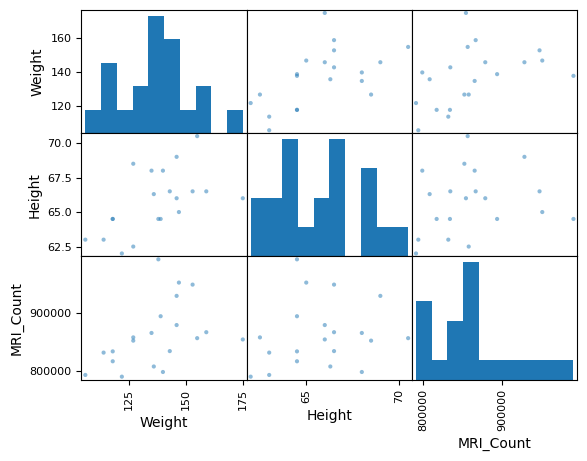

In [10]:
plotting.scatter_matrix(data1[['Weight', 'Height', 'MRI_Count']])

array([[<Axes: xlabel='PIQ', ylabel='PIQ'>,
        <Axes: xlabel='VIQ', ylabel='PIQ'>,
        <Axes: xlabel='FSIQ', ylabel='PIQ'>],
       [<Axes: xlabel='PIQ', ylabel='VIQ'>,
        <Axes: xlabel='VIQ', ylabel='VIQ'>,
        <Axes: xlabel='FSIQ', ylabel='VIQ'>],
       [<Axes: xlabel='PIQ', ylabel='FSIQ'>,
        <Axes: xlabel='VIQ', ylabel='FSIQ'>,
        <Axes: xlabel='FSIQ', ylabel='FSIQ'>]], dtype=object)

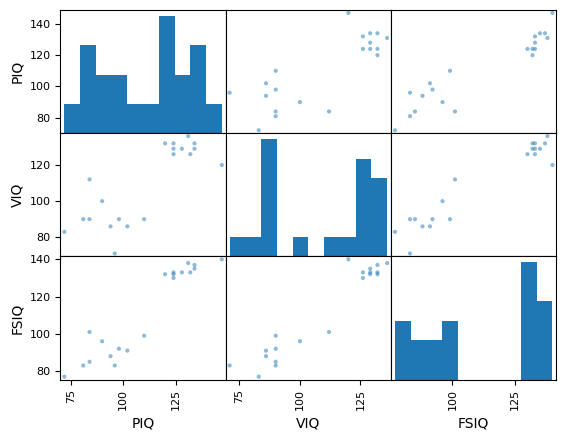

In [11]:
plotting.scatter_matrix(data1[['PIQ', 'VIQ', 'FSIQ']])  

array([[<Axes: xlabel='Weight', ylabel='Weight'>,
        <Axes: xlabel='Height', ylabel='Weight'>,
        <Axes: xlabel='MRI_Count', ylabel='Weight'>],
       [<Axes: xlabel='Weight', ylabel='Height'>,
        <Axes: xlabel='Height', ylabel='Height'>,
        <Axes: xlabel='MRI_Count', ylabel='Height'>],
       [<Axes: xlabel='Weight', ylabel='MRI_Count'>,
        <Axes: xlabel='Height', ylabel='MRI_Count'>,
        <Axes: xlabel='MRI_Count', ylabel='MRI_Count'>]], dtype=object)

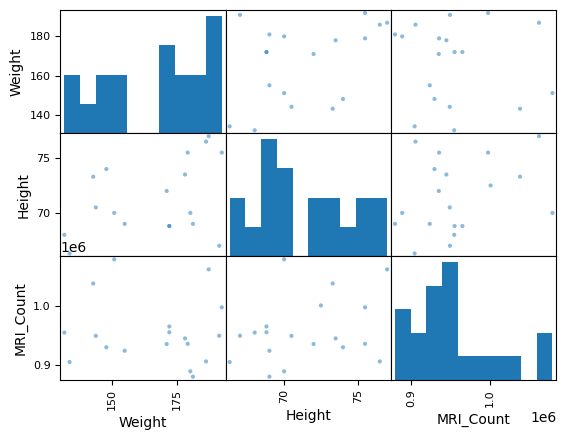

In [12]:
plotting.scatter_matrix(data2[['Weight', 'Height', 'MRI_Count']])

array([[<Axes: xlabel='PIQ', ylabel='PIQ'>,
        <Axes: xlabel='VIQ', ylabel='PIQ'>,
        <Axes: xlabel='FSIQ', ylabel='PIQ'>],
       [<Axes: xlabel='PIQ', ylabel='VIQ'>,
        <Axes: xlabel='VIQ', ylabel='VIQ'>,
        <Axes: xlabel='FSIQ', ylabel='VIQ'>],
       [<Axes: xlabel='PIQ', ylabel='FSIQ'>,
        <Axes: xlabel='VIQ', ylabel='FSIQ'>,
        <Axes: xlabel='FSIQ', ylabel='FSIQ'>]], dtype=object)

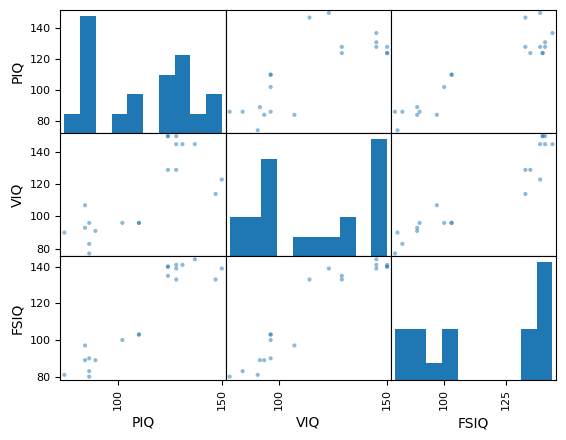

In [13]:
plotting.scatter_matrix(data2[['PIQ', 'VIQ', 'FSIQ']])  

In [14]:
# 2 sub-populations do not seem to correspond to gender

In [15]:
female_viq = data[data['Gender'] == 'Female']['VIQ']

In [16]:
male_viq = data[data['Gender'] == 'Male']['VIQ']

# Exercise 3

In [17]:
# Test the difference between weights in males and females.

In [18]:
female_weight = data[data['Gender'] == 'Female']['Weight']

In [19]:
male_weight = data[data['Gender'] == 'Male']['Weight']

In [20]:
stats.ttest_ind(female_weight.dropna(), male_weight.dropna())

TtestResult(statistic=-4.870950921940696, pvalue=2.227293018362118e-05, df=36.0)

In [21]:
# Use non parametric statistics to test the difference between VIQ in males and females

In [22]:
stats.mannwhitneyu(female_viq, male_viq)

MannwhitneyuResult(statistic=164.5, pvalue=0.3422886868727315)

# Linear modeling, multiple factors, and variance analysis

In [23]:
# Linear regression
x = np.linspace(-5, 5, 20)
np.random.seed(1)

In [24]:
# normal distributed noise
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)

In [25]:
# Create a data frame containing all the relevant variables
data3 = pd.DataFrame({'x': x, 'y': y})

In [26]:
# OLS model
model1 = ols("y ~ x", data3).fit()

In [27]:
print(model1.summary())  

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           8.56e-08
Time:                        17:48:43   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

# Exercise 4

In [28]:
# Retrieve the estimated parameters from the model above

In [29]:
print(model1.params)

Intercept   -5.533459
x            2.936888
dtype: float64


In [30]:
print(model1.cov_params)

<bound method LikelihoodModelResults.cov_params of <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fd67a50e0a0>>


# Exercise 5

In [31]:
# Going back to the brain size + IQ data, test if the VIQ of male and female are 
# different after removing the effect of brain size, height and weight

In [32]:
model2 = ols('VIQ ~ Gender + Height + Weight + MRI_Count', data).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     2.733
Date:                Thu, 13 Jul 2023   Prob (F-statistic):             0.0455
Time:                        17:48:43   Log-Likelihood:                -167.03
No. Observations:                  38   AIC:                             344.1
Df Residuals:                      33   BIC:                             352.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        169.7719     90.054      1.

In [33]:
print(model2.f_test([0, 1, 0, 0, 0])) 

<F test: F=0.8698460744965434, p=0.35777194392092526, df_denom=33, df_num=1>
